# Agrupamiento K Means: Ejercicio Propuesto

### Alumno: Pisaña Llamocca Patrick Florian 
### Codigo: 19200093

Para este proyecto intentaremos utilizar Agrupamiento K Means para agrupar Universidades en dos grupos, Privado y Público.
___
Es **muy importante tener en cuenta que, de hecho, tenemos las etiquetas para este conjunto de datos, pero NO los utilizaremos para el algoritmo de agrupamiento de KMeans, ya que es un algoritmo de aprendizaje no supervisado.**

Cuando se utiliza el algoritmo Kmeans en circunstancias normales, es porque no tiene etiquetas. En este caso usaremos las etiquetas para tratar de tener una idea de qué tan bien funcionó el algoritmo, pero generalmente no se tienen estas para Kmeans, por lo que el informe de clasificación y la matriz de confusión al final de este proyecto no se hacen realmente. ¡tiene sentido en un entorno real!
___



## Los Datos

Utilizaremos un dataframe con 777 observaciones sobre las siguientes 18 variables.
* Private Un factor con niveles No y Yes que indica universidad privada o pública
* Apps Número de solicitudes recibidas
* Accept Número de aplicaciones aceptadas
* Enroll Número de nuevos estudiantes matriculados
* Top10perc Pct. nuevos estudiantes del 10% superior de H.S.
* Top25perc Pct. nuevos estudiantes del 25% superior de H.S.
* F.Undergrad Número de estudiantes a tiempo completo
* P.Undergrad Número de estudiantes a tiempo parcial
* Outstate Matrícula fuera del estado
* Room.Board Costos de habitación y comida
* Books Costos estimados del libro
* Personal Gasto personal estimado
* PhD Pct. de la facultad con Ph.D.
* Terminal Pct. de la facultad con grado terminal
* S.F.Ratio Proporción estudiante / facultad
* perc.alumni Pct. ex alumnos que donan
* Expend Gastos de instrucción por estudiante
* Grad.Rate Tasa de graduación

## Importar librerias

** Importe las librerias que generalmente usa para el análisis de datos. **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtener los Datos

In [26]:
datos = pd.read_csv('College_Data')

** Lea en el archivo College_Data usando read_csv. Configure la primera columna como índice.**

In [27]:
datos = pd.read_csv('College_Data' , index_col=0) 

**Revise los primeros registros de los datos**

In [28]:
datos.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Aplique los métodos info() y describe() en los datos.**

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [30]:
datos.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Análisis Exploratorio de Datos

¡Es hora de crear algunas visualizaciones de datos!

** Crea un diagrama de dispersión de Grad.Rate vs Room.Board donde los puntos están coloreados por la columna Private. **

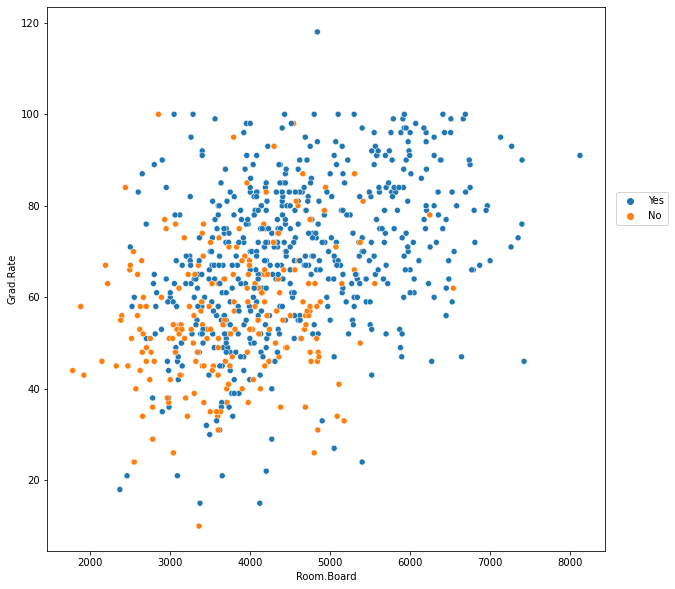

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Room.Board",y="Grad.Rate", data = datos,hue="Private")
plt.legend(loc=(1.02,0.6))

**Crea un diagrama de dispersión de F.Undergrad vs Outstate donde los puntos están coloreados por la columna Private.**

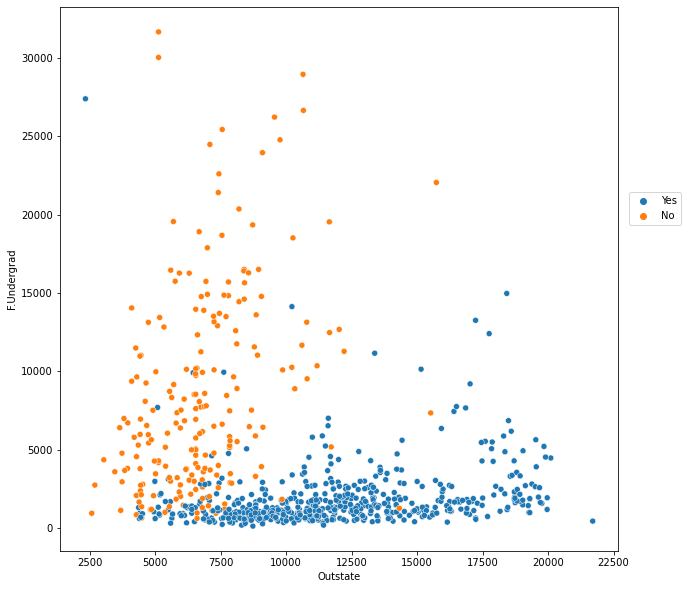

In [106]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x= "Outstate", y="F.Undergrad", hue="Private", data = datos)
plt.legend(loc=(1.02,0.6))

# ** Cree un histograma apilado que muestre la matrícula fuera del estado según la columna Private. Intente hacerlo usando  [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Si eso es demasiado complicado, vea si puede hacerlo simplemente usando dos instancias de pandas.plot(kind='hist'). **

C:\Users\Patrick\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


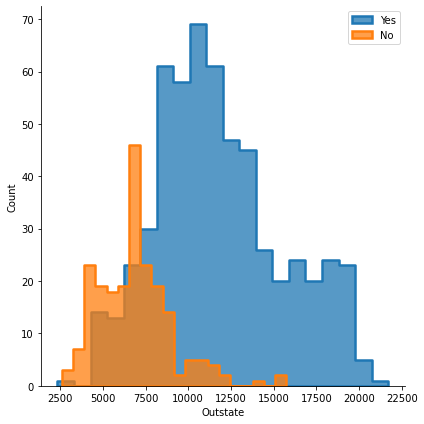

In [315]:
g = sns.FacetGrid(datos , hue='Private', size=6)
g.map_dataframe(sns.histplot, x='Outstate',element='step' , bins = 20,linewidth=2.5)
plt.legend()

**Create un histograma similar para la columna Grad.Rate.**

C:\Users\Patrick\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


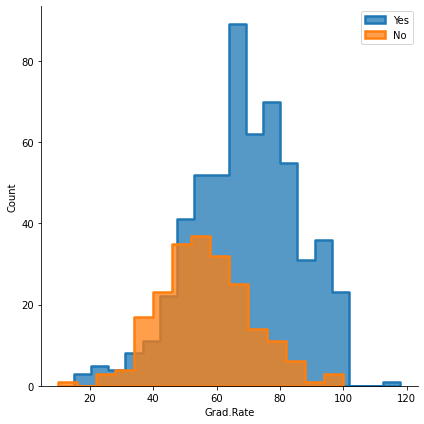

In [316]:
g1 = sns.FacetGrid(datos, hue='Private', size=6)
g1.map_dataframe(sns.histplot, x='Grad.Rate',element='step', linewidth=2.5)
plt.legend()

** Observe cómo parece haber una escuela privada con una tasa de graduación superior al 100%. ¿Cuál es el nombre de esa escuela?**

In [317]:
datos[datos["Grad.Rate"]>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Establezca la tasa de graduación de esa escuela en 100, de modo que tenga sentido. Puede obtener una advertencia, no un error, al realizar esta operación, por lo tanto, utilice las operaciones de dataframe o simplemente vuelva a hacer la visualización del histograma para asegurarse de que realmente se realizó. **

In [318]:
newdatos = datos[datos["Grad.Rate"]<=100]

In [319]:
newdatos

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


C:\Users\Patrick\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


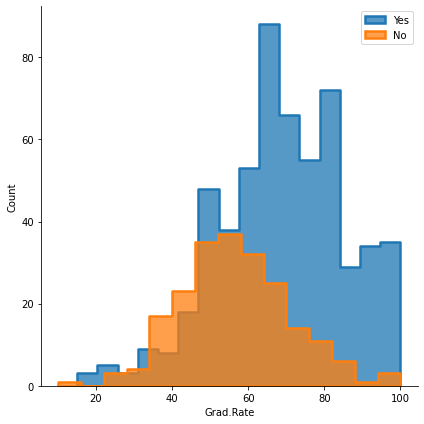

In [325]:
g1 = sns.FacetGrid(newdatos, hue='Private', size=6)
g1.map_dataframe(sns.histplot, x='Grad.Rate',element='step', linewidth=2.5)
plt.legend()

## Creación del clúster K Means

¡Ahora es el momento de crear las etiquetas del Cluster!

** Importar KMeans de SciKit Learn. **

In [326]:
from sklearn.cluster import KMeans

** Crea una instancia de un modelo de KM eans con 2 clústeres. **

In [327]:

kmeans = KMeans(n_clusters=2)

** Ajuste el modelo a todos los datos a excepción de la etiqueta Private. **

In [328]:
kmeans.fit(datos.drop('Private', axis=1))

KMeans(n_clusters=2)

** ¿Cuáles son los centro del grupo de los vectores? **

In [329]:
print(kmeans.cluster_centers_)

[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]


## Evaluación

No existe una forma perfecta de evaluar la agrupación si no se cuenta con las etiquetas, sin embargo, dado que se trata de un ejercicio y sí tenemos las etiquetas, por lo que aprovechamos esto para evaluar nuestros grupos, tenga en cuenta que generalmente no es así en el mundo real.

** Cree una nueva columna para df llamada 'Cluster', que es un 1 para una escuela privada y un 0 para una escuela pública. **

In [330]:
Cluster = pd.get_dummies(datos['Private'],drop_first=True)
Cluster.set_axis(['Cluster'], axis='columns', inplace=True)    

In [331]:
datos = pd.concat([datos,Cluster],axis=1)

In [332]:
datos.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [333]:
from sklearn.model_selection import train_test_split
X = datos.drop(['Private','Cluster'],axis=1)
y = datos['Cluster']

** Cree una matriz de confusión y un informe de clasificación para ver qué tan bien funcionó el clúster de K Means sin etiquetas. **

In [334]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = kmeans.predict(X)
print(confusion_matrix(y,predictions))
print(classification_report(y,predictions))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [335]:
 kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

¡No está mal teniendo en cuenta que el algoritmo está utilizando puramente las características para agrupar las universidades en 2 grupos distintos! ¡Con suerte, puede comenzar a ver cómo K Means es útil para agrupar datos no etiquetados!

## Great Job!